In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

In [2]:
plt.rcParams['figure.figsize'] = [20, 10]

def show(img):
    plt.imshow(img[...,::-1])
    plt.show()

In [3]:
img = cv2.imread('media/G0050194_2.JPG',0)

In [4]:
img

array([[142, 123, 106, ..., 198, 197, 196],
       [122,  81,  50, ..., 198, 197, 196],
       [ 80,  44,  21, ..., 199, 198, 197],
       ...,
       [ 72,  60,  62, ..., 185, 184, 183],
       [ 60,  68,  96, ..., 184, 183, 182],
       [ 63,  92, 128, ..., 184, 183, 182]], dtype=uint8)

In [5]:
img2 = img.copy()

In [6]:
cv2.imwrite('test.jpg',img)

True

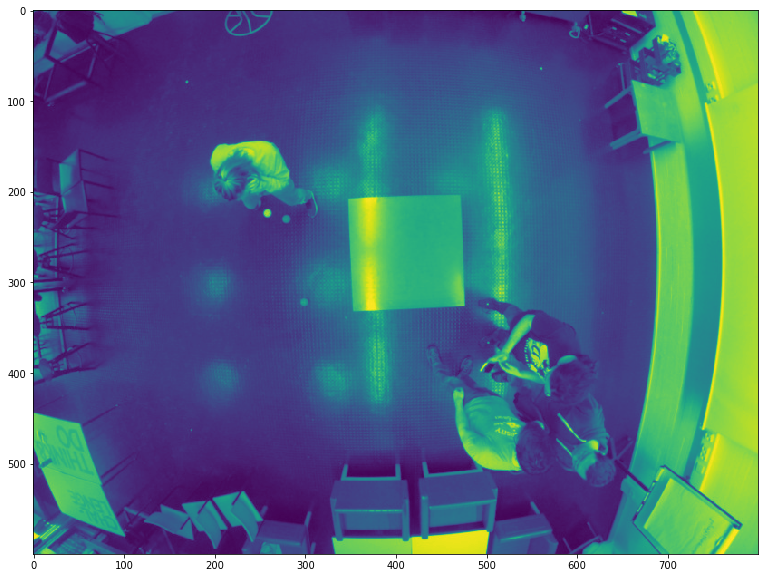

In [7]:
#img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

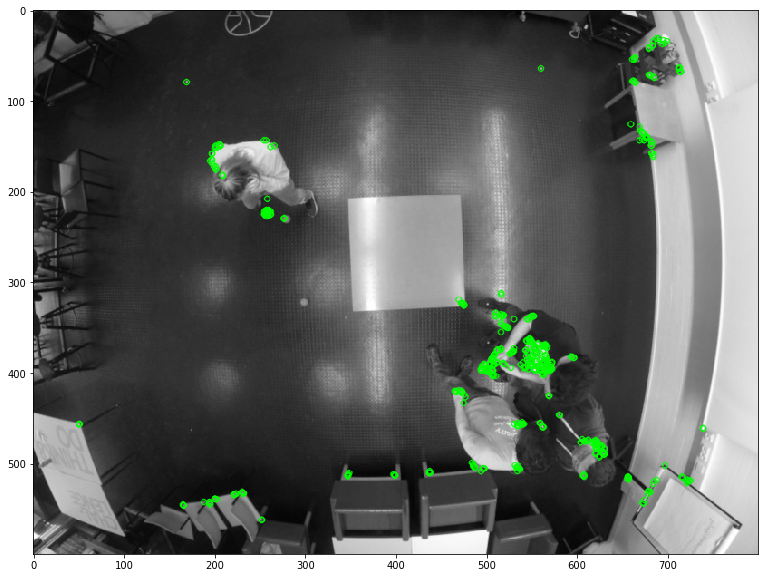

(<matplotlib.image.AxesImage at 0x7f7e35dd0860>, None)

In [8]:
img = cv2.imread('media/G0050194_2.JPG',0)
orb = cv2.ORB_create()
kp = orb.detect(img, None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp ,img2, color=(0,255,0), flags=0)
plt.imshow(img2),plt.show()

In [9]:
cv2.imwrite('test_orb.jpg',img2)

True

In [10]:
cap = cv2.VideoCapture('media/kick_ball.m4v')

ret,frame1 = cap.read()

for i in range(100):
    cap.read()

ret,frame2 = cap.read()

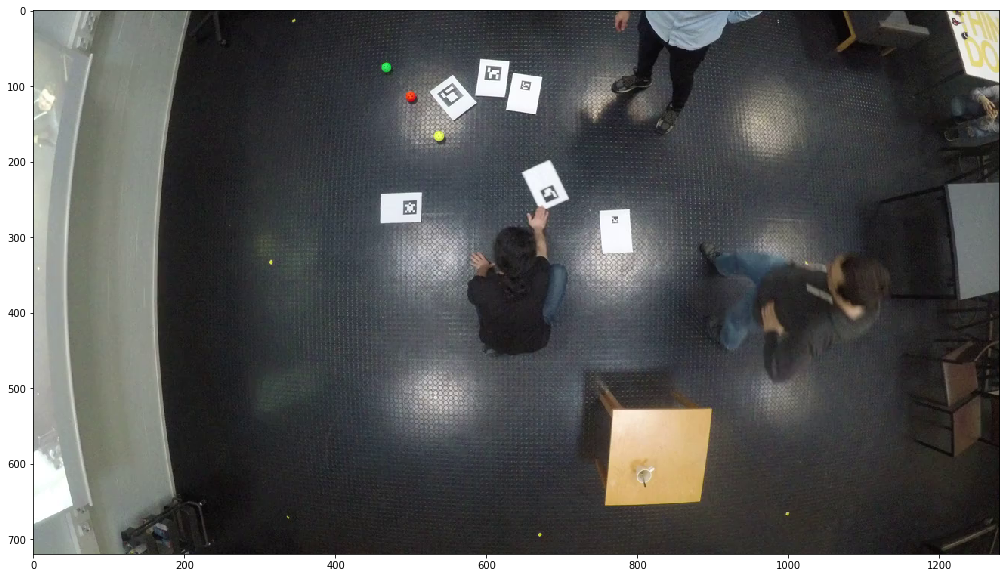

In [11]:
show(frame1)

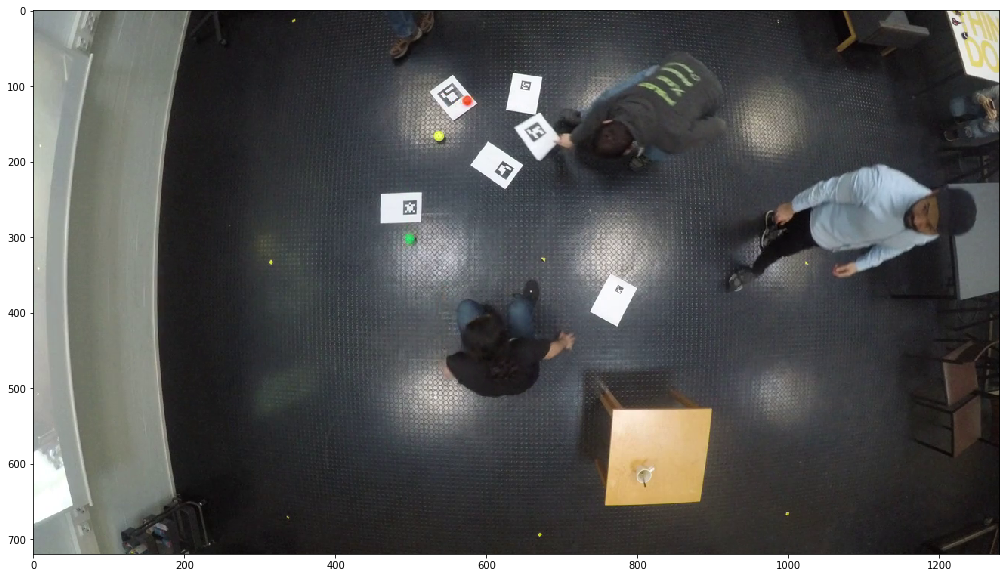

In [12]:
show(frame2)

# Ball Detection

In [13]:
def distance_between_points(p1, p2):
    return math.hypot(p1[0] - p2[0], p1[1] - p2[1])

def has_close_points(point, others, radius):
    for other in others:
        if (distance_between_points(point.pt, other.pt) < radius):
            return True
    return False

def merge_keypoints(keypoints, radius):
    result = []
    for point in keypoints:
        if (not has_close_points(point, result, radius)):
            result += [point]
    
    return result

In [16]:
iii = cv2.imread('/home/smw/cv_test.jpg',0)
#hsv = cv2.cvtColor(iii, cv2.COLOR_BGR2HSV)
np.shape(iii)

error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3>; VDepth = cv::impl::{anonymous}::Set<0, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = (cv::impl::<unnamed>::SizePolicy)2u; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


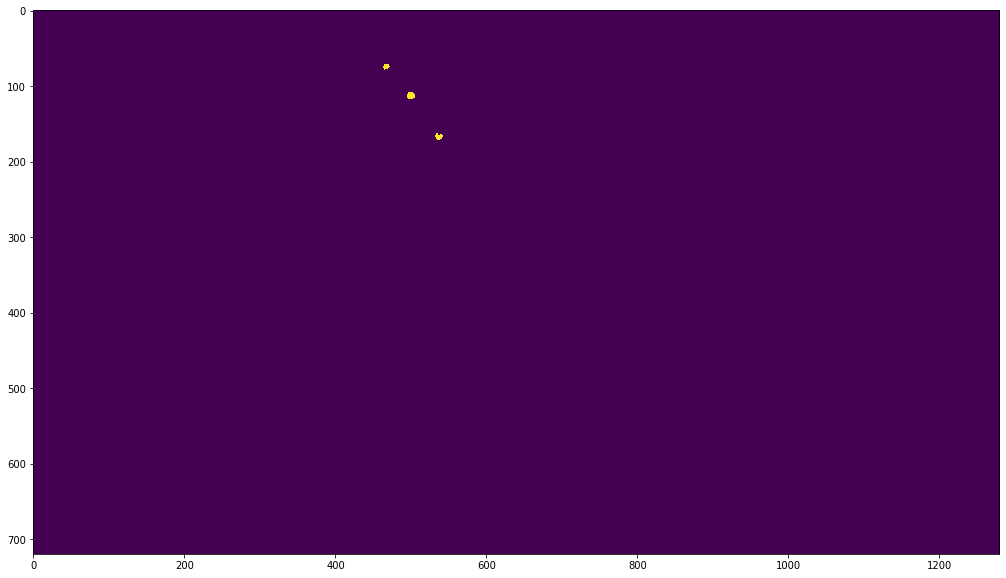

In [20]:
def maskFrame(frame):
    frame = cv2.GaussianBlur(frame,(5,5),0);

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    return cv2.inRange(hsv, 
                       np.array([0,145,210]), 
                       np.array([255,255,255]))


plt.imshow(maskFrame(frame1))
plt.show()

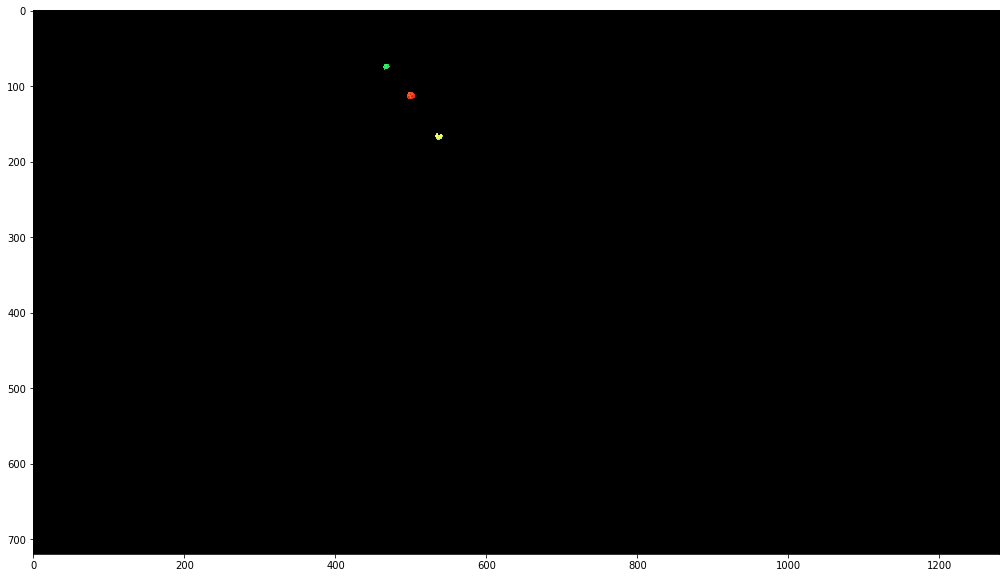

In [21]:
cap = cv2.VideoCapture('media/kick_ball.m4v')

ret,frame = cap.read()

img = cv2.bitwise_and(frame,frame, mask= maskFrame(frame))
show(img)

(534.0, 165.0)


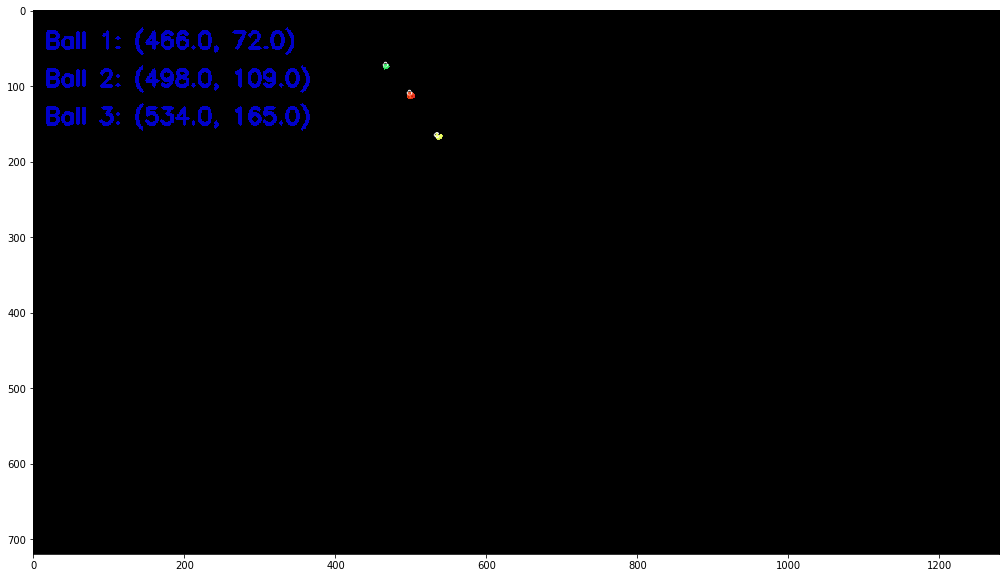

In [19]:
fast = cv2.FastFeatureDetector_create()

kp = fast.detect(img,None)
kp = merge_keypoints(kp, 20)
img2 = cv2.drawKeypoints(img, kp, None, color=(255,255,255))

print(kp[2].pt)

cv2.putText(img2, 'Ball 1: ' + str(kp[0].pt), (15, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, 200, 3)
cv2.putText(img2, 'Ball 2: ' + str(kp[1].pt), (15, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, 200, 3)
cv2.putText(img2, 'Ball 3: ' + str(kp[2].pt), (15, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, 200, 3)
show(img2)

# Video Demo

In [19]:
cap = cv2.VideoCapture('media/kick_ball.m4v')
fast = cv2.FastFeatureDetector_create()

ret,frame = cap.read()
while(1):
    ret ,frame = cap.read()

    if ret == True:
        kp = fast.detect(frame,maskFrame(frame))
        kp = merge_keypoints(kp, 20)
        img2 = cv2.drawKeypoints(frame, kp, None, color=(255,255,255))

        if len(kp) > 0:
            cv2.putText(img2, 'Ball 1: ' + str(kp[0].pt), (15, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, 200, 3)
        if len(kp) > 1:
            cv2.putText(img2, 'Ball 2: ' + str(kp[1].pt), (15, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, 200, 3)
        if len(kp) > 2:
            cv2.putText(img2, 'Ball 3: ' + str(kp[2].pt), (15, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, 200, 3)

        cv2.imshow('img2',img2)

        k = cv2.waitKey(20) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)

    else:
        break

cv2.destroyAllWindows()
cap.release()